# Problem Statement
Accurately predicting stock prices is a challenging task due to the volatile and complex nature of the stock market. Traditional methods often struggle to capture the nonlinear patterns and temporal dependencies in stock price data, leading to inaccurate predictions.

# Objective
The objective of this project is to develop an LSTM-based model for predicting future stock prices. By leveraging the ability of LSTMs to model time series data, the project aims to improve the accuracy of stock price forecasts and assist in making informed investment decisions.

# Load the libraries

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [2]:
start = '2014-01-01'
end = '2024-08-09'

# Analyze different company stocks

## APPLE

In [3]:
df_1 = yf.download('AAPL', start=start, end=end)
df_1.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273230,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893808,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985922,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864449,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971258,258529600


In [4]:
df_1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-02,219.149994,225.600006,217.710007,219.860001,219.860001,105568600
2024-08-05,199.089996,213.500000,196.000000,209.270004,209.270004,119548600
2024-08-06,205.300003,209.990005,201.070007,207.229996,207.229996,69660500
2024-08-07,206.899994,213.639999,206.389999,209.820007,209.820007,63516400
2024-08-08,213.110001,214.199997,208.830002,213.309998,213.309998,47161100


In [5]:
df_1.shape

(2668, 6)

In [6]:
df_1.reset_index(inplace=True)
df_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273230,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893808,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985922,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864449,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971258,258529600


In [7]:
df_1.drop(['Date','Adj Close'], axis=1, inplace=True)
df_1.head()

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600


Text(0.5, 1.0, 'APPLE Close Price History')

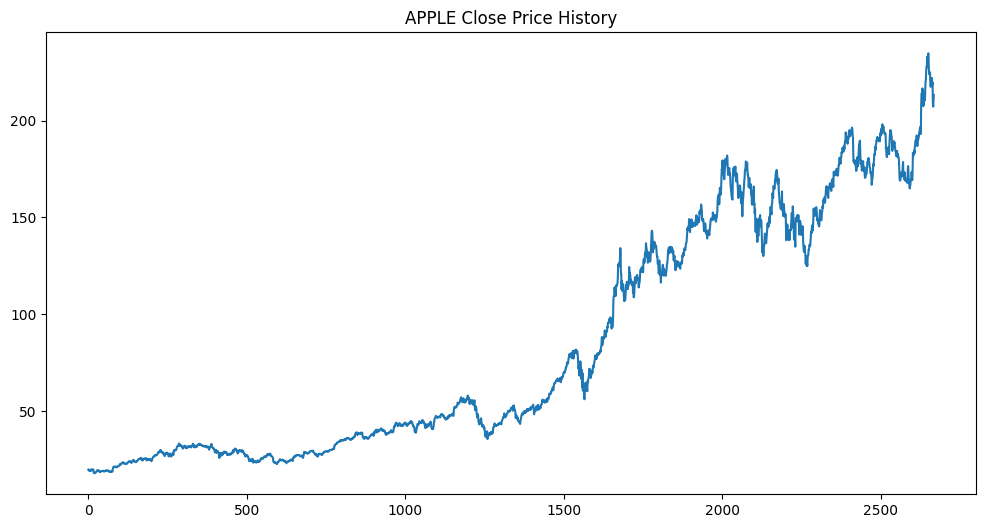

In [183]:
plt.figure(figsize=(12,6))
plt.plot(df_1['Close'])
plt.title('APPLE Close Price History')

In [9]:
ma100 = df_1['Close'].rolling(100).mean()
ma100.isnull().sum()

99

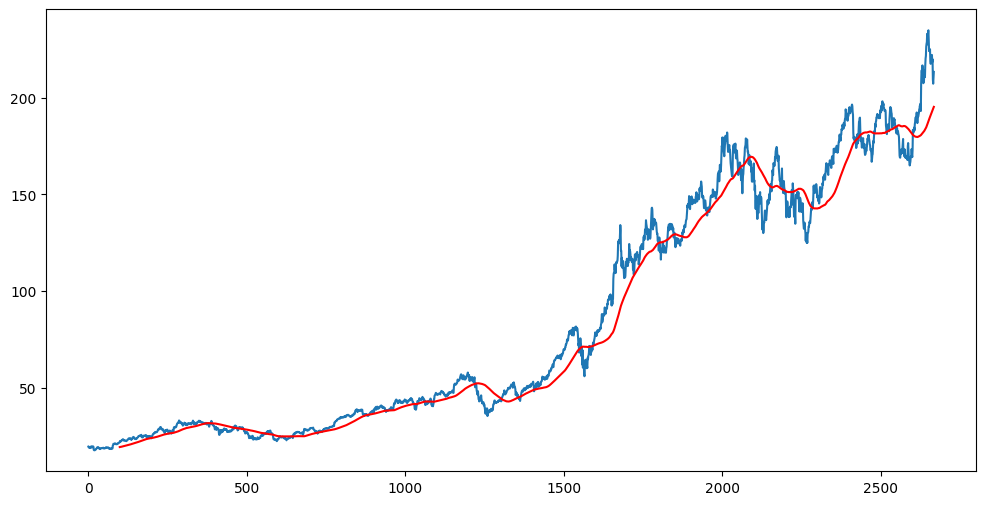

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df_1['Close'])
plt.plot(ma100, 'r')

In [11]:
ma200 = df_1['Close'].rolling(200).mean()
ma200.isnull().sum()

199

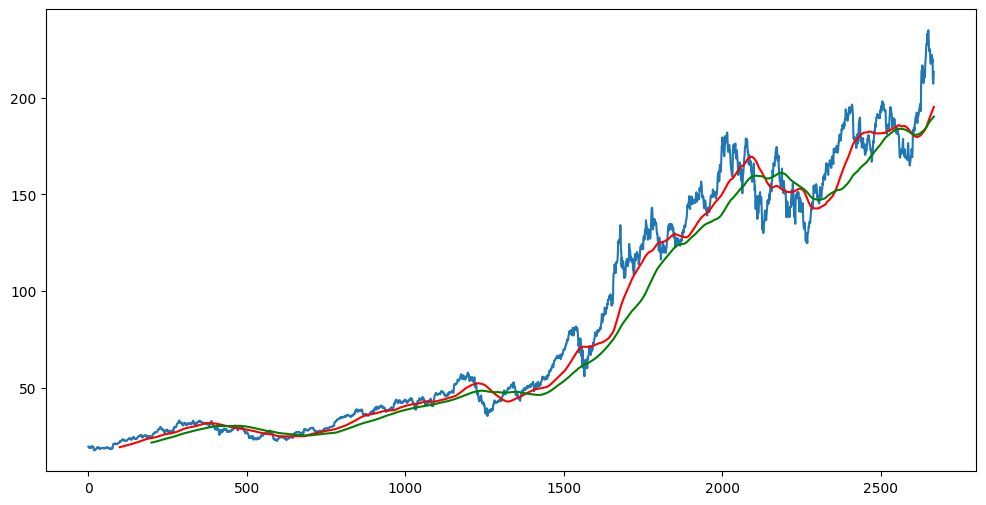

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df_1['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')



---


**Bullish Signal:** When the 100-day moving average crosses above the 200-day moving average, it is often interpreted as a bullish signal, indicating that the market is gaining strength.


---


**Bearish Signal:** Conversely, when the 100-day moving average crosses below the 200-day moving average, it is considered a bearish signal, suggesting that the market might be weakening.


---



In [13]:
split_index = int(0.7 * len(df_1))

train_df = df_1['Close'].iloc[:split_index]
test_df = df_1['Close'].iloc[split_index:]

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (1867,)
Testing set shape: (801,)


In [14]:
train_df.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [15]:
test_df.head()

,Close
1867,123.540001
1868,125.889999
1869,125.900002
1870,126.739998
1871,127.129997


In [16]:
scaler_1 = MinMaxScaler(feature_range=(0,1))

In [17]:
train_array = scaler_1.fit_transform(np.array(train_df).reshape(-1,1))
train_array[:5]

array([[0.01520506],
       [0.01174225],
       [0.01258301],
       [0.01147435],
       [0.01244907]])

In [18]:
test_array = scaler_1.transform(np.array(test_df).reshape(-1,1))
test_array[:5]

array([[0.84342917],
       [0.86218255],
       [0.86226236],
       [0.86896567],
       [0.87207793]])

In [19]:
x_train_1 = []
y_train_1 = []

for i in range(100, train_array.shape[0]):
    x_train_1.append(train_array[i-100: i])
    y_train_1.append(train_array[i, 0])

x_train_1, y_train_1 = np.array(x_train_1), np.array(y_train_1)

In [20]:
x_train_1.shape

(1767, 100, 1)

In [21]:
model_1 = Sequential()
model_1.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train_1.shape[1], 1)))
model_1.add(Dropout(0.2))

model_1.add(LSTM(units=60, activation='relu', return_sequences=True))
model_1.add(Dropout(0.3))

model_1.add(LSTM(units=80, activation='relu', return_sequences=True))
model_1.add(Dropout(0.4))

model_1.add(LSTM(units=120, activation='relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(units=1))

In [22]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model_1.compile(optimizer='adam', loss='mean_squared_error')
model_1.fit(x_train_1, y_train_1, epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 506ms/step - loss: 0.0643
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 295ms/step - loss: 0.0102
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 312ms/step - loss: 0.0079
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 301ms/step - loss: 0.0041
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 292ms/step - loss: 0.0038
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 303ms/step - loss: 0.0044
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 300ms/step - loss: 0.0035
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 307ms/step - loss: 0.0036
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - loss: 0.0035
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 296ms/step - loss: 0.0030
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 293ms/step - loss: 0.0037
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 308ms/step - loss: 0.0031
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - loss: 0.0039
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - loss: 0.0022
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 

In [24]:
model_1.save('keras_model_1.h5')

In [25]:
past_100_days = train_df.tail(100)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
final_df.head()

,Close
0,132.050003
1,128.979996
2,128.800003
3,130.889999
4,128.910004


In [26]:
input_data_1 = scaler_1.fit_transform(final_df.values.reshape(-1, 1))
input_data_1 = pd.DataFrame(input_data_1, columns=[final_df.name])
input_data_1.head()

,Close
0,0.132450
1,0.106534
2,0.105014
3,0.122657
4,0.105943


In [27]:
input_data_1.shape

(901, 1)

In [28]:
x_test_1 = []
y_test_1 = []

input_data_1 = np.array(input_data_1)
for i in range(100, input_data_1.shape[0]):
    x_test_1.append(input_data_1[i-100: i])
    y_test_1.append(input_data_1[i, 0])

In [29]:
x_test_1, y_test_1 = np.array(x_test_1), np.array(y_test_1)
print(x_test_1.shape)
print(y_test_1.shape)

(801, 100, 1)
(801,)


In [30]:
y_pred_1 = model_1.predict(x_test_1)
y_pred_1.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step


(801, 1)

In [31]:
scale_factor_1 = 1/scaler_1.scale_
y_pred_1 = y_pred_1 * scale_factor_1
y_test_1 = y_test_1 * scale_factor_1

Text(0, 0.5, 'Price')

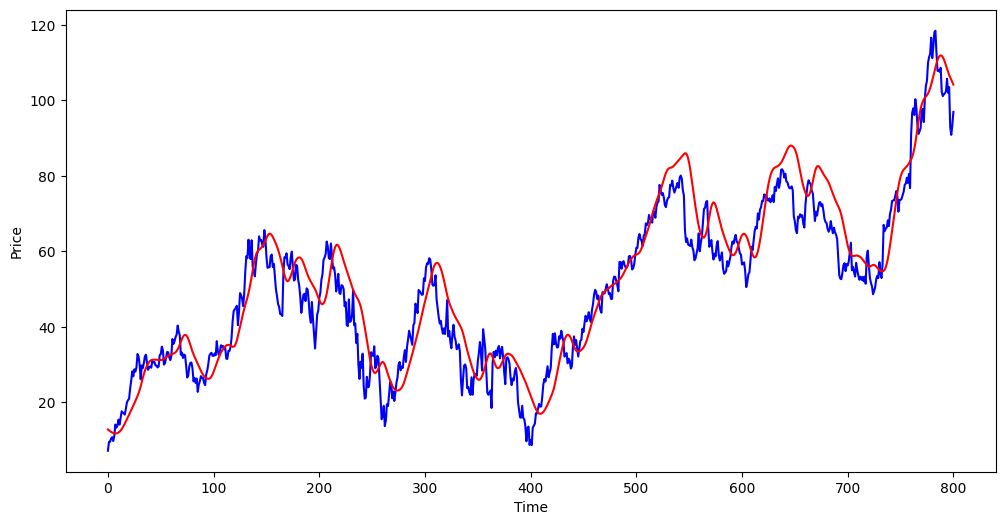

In [32]:
plt.figure(figsize=(12,6))
plt.plot(y_test_1, 'b', label='Original Price')
plt.plot(y_pred_1, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')

## TESLA

In [33]:
df_2 = yf.download('TSLA', start=start, end=end)
df_2.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000


In [34]:
df_2.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-02,214.880005,216.130005,205.779999,207.669998,207.669998,82880100
2024-08-05,185.220001,203.880005,182.000000,198.880005,198.880005,100308800
2024-08-06,200.750000,202.899994,192.669998,200.639999,200.639999,73783900
2024-08-07,200.770004,203.490005,191.479996,191.759995,191.759995,71159800
2024-08-08,195.699997,200.699997,192.039993,198.839996,198.839996,65033900


In [35]:
df_2.shape

(2668, 6)

In [36]:
df_2.reset_index(inplace=True)
df_2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000


In [37]:
df_2.drop(['Date','Adj Close'], axis=1, inplace=True)
df_2.head()

,Open,High,Low,Close,Volume
0,9.986667,10.165333,9.770000,10.006667,92826000
1,10.000000,10.146000,9.906667,9.970667,70425000
2,10.000000,10.026667,9.682667,9.800000,80416500
3,9.841333,10.026667,9.683333,9.957333,75511500
4,9.923333,10.246667,9.917333,10.085333,92448000


Text(0.5, 1.0, 'TESLA Close Price History')

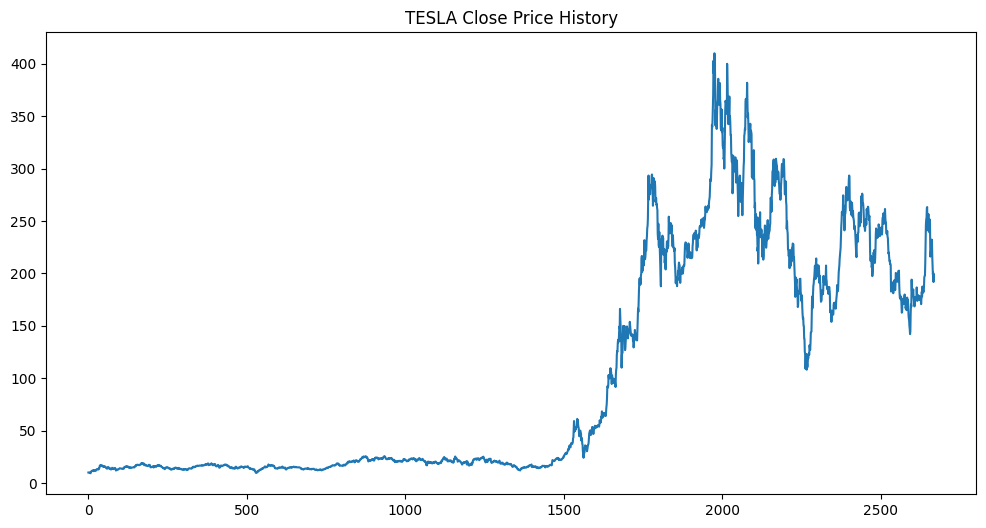

In [38]:
plt.figure(figsize=(12,6))
plt.plot(df_2['Close'])
plt.title('TESLA Close Price History')

In [39]:
ma100 = df_2['Close'].rolling(100).mean()
ma100.isnull().sum()

99

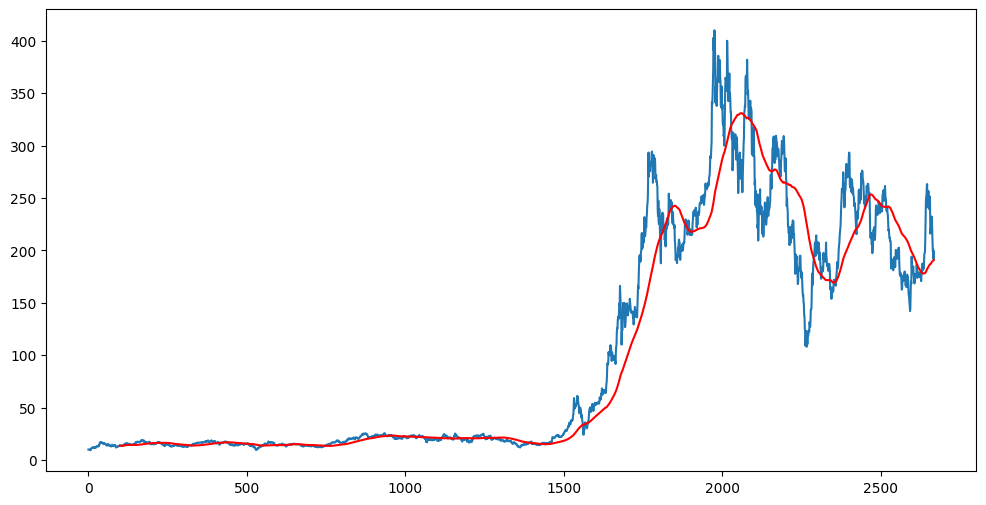

In [40]:
plt.figure(figsize=(12,6))
plt.plot(df_2['Close'])
plt.plot(ma100, 'r')

In [41]:
ma200 = df_2['Close'].rolling(200).mean()
ma200.isnull().sum()

199

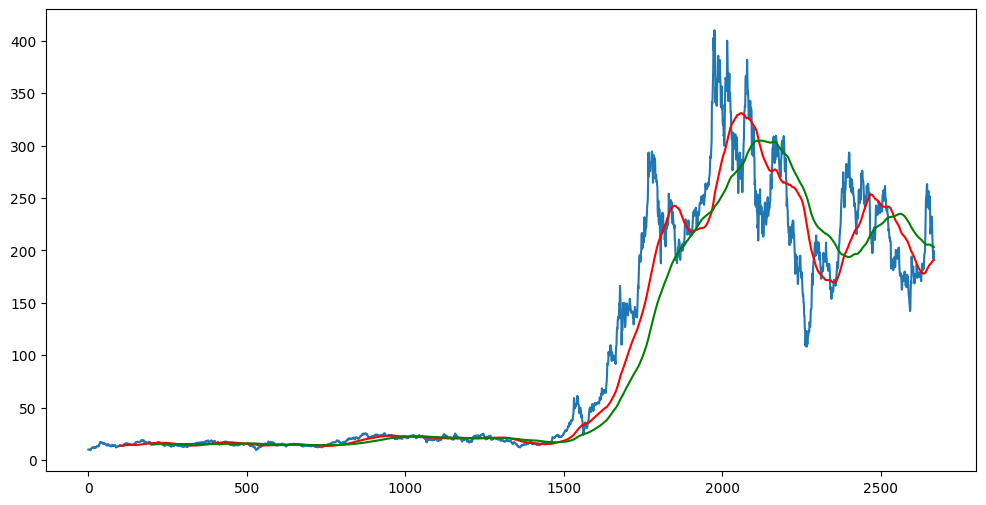

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df_2['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [43]:
split_index = int(0.7 * len(df_2))

train_df = df_2['Close'].iloc[:split_index]
test_df = df_2['Close'].iloc[split_index:]

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (1867,)
Testing set shape: (801,)


In [44]:
train_df.head()

,Close
0,10.006667
1,9.970667
2,9.800000
3,9.957333
4,10.085333


In [45]:
test_df.head()

,Close
1867,190.946671
1868,199.683334
1869,201.710007
1870,201.196671
1871,199.593338


In [46]:
scaler_2 = MinMaxScaler(feature_range=(0,1))

In [47]:
train_array = scaler_2.fit_transform(np.array(train_df).reshape(-1,1))
train_array[:5]

array([[0.00251631],
       [0.00239002],
       [0.00179135],
       [0.00234325],
       [0.00279226]])

In [48]:
test_array = scaler_2.transform(np.array(test_df).reshape(-1,1))
test_array[:5]

array([[0.63722869],
       [0.66787569],
       [0.67498498],
       [0.67318427],
       [0.66756   ]])

In [49]:
x_train_2 = []
y_train_2 = []

for i in range(100, train_array.shape[0]):
    x_train_2.append(train_array[i-100: i])
    y_train_2.append(train_array[i, 0])

x_train_2, y_train_2 = np.array(x_train_2), np.array(y_train_2)

In [50]:
x_train_2.shape

(1767, 100, 1)

In [51]:
model_2 = Sequential()
model_2.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train_2.shape[1], 1)))
model_2.add(Dropout(0.2))

model_2.add(LSTM(units=60, activation='relu', return_sequences=True))
model_2.add(Dropout(0.3))

model_2.add(LSTM(units=80, activation='relu', return_sequences=True))
model_2.add(Dropout(0.4))

model_2.add(LSTM(units=120, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(units=1))

In [52]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_2.compile(optimizer='adam', loss='mean_squared_error')
model_2.fit(x_train_2, y_train_2, epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 300ms/step - loss: 0.0277
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 299ms/step - loss: 0.0039
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - loss: 0.0033
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - loss: 0.0041
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - loss: 0.0035
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 337ms/step - loss: 0.0035
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 311ms/step - loss: 0.0026
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - loss: 0.0030
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 320ms/step - loss: 0.0029
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - loss: 0.0026
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 324ms/step - loss: 0.0022
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - loss: 0.0019
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 304ms/step - loss: 0.0023
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - loss: 0.0022
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [54]:
model_2.save('keras_model_2.h5')

In [55]:
past_100_days = train_df.tail(100)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
final_df.head()

,Close
0,293.339996
1,270.396667
2,283.146667
3,284.803345
4,281.666656


In [56]:
input_data_2 = scaler_2.fit_transform(final_df.values.reshape(-1, 1))
input_data_2 = pd.DataFrame(input_data_2, columns=[final_df.name])
input_data_2.head()

,Close
0,0.613642
1,0.537638
2,0.579874
3,0.585362
4,0.574972


In [57]:
input_data_2.shape

(901, 1)

In [58]:
x_test_2 = []
y_test_2 = []

input_data_2 = np.array(input_data_2)
for i in range(100, input_data_2.shape[0]):
    x_test_2.append(input_data_2[i-100: i])
    y_test_2.append(input_data_2[i, 0])

In [59]:
x_test_2, y_test_2 = np.array(x_test_2), np.array(y_test_2)
print(x_test_2.shape)
print(y_test_2.shape)

(801, 100, 1)
(801,)


In [60]:
y_pred_2 = model_2.predict(x_test_2)
y_pred_2.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


(801, 1)

In [61]:
scale_factor_2 = 1/scaler_2.scale_
y_pred_2 = y_pred_2 * scale_factor_2
y_test_2 = y_test_2 * scale_factor_2

Text(0, 0.5, 'Price')

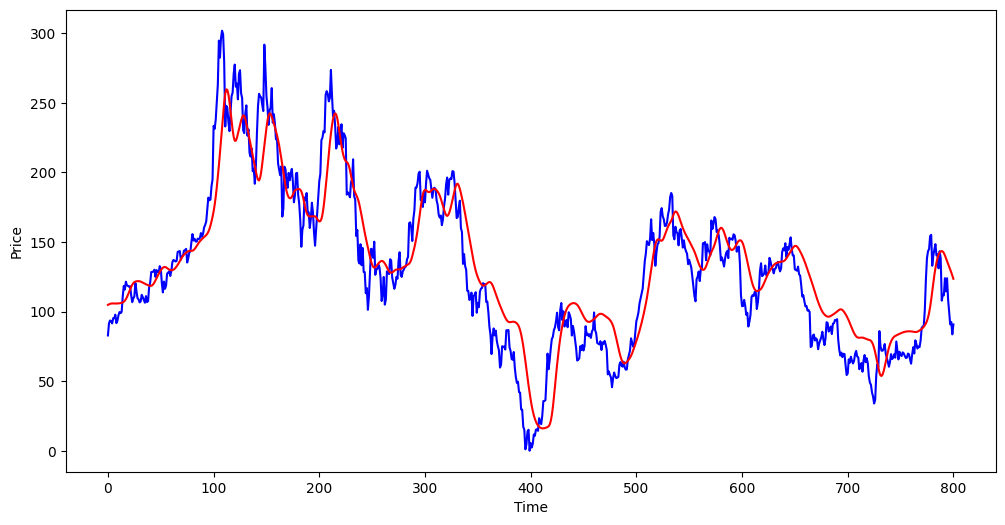

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test_2, 'b', label='Original Price')
plt.plot(y_pred_2, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')

## META

In [63]:
df_3 = yf.download('META', start=start, end=end)
df_3.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,54.830002,55.220001,54.189999,54.709999,54.597805,43195500
2014-01-03,55.020000,55.650002,54.529999,54.560001,54.448116,38246200
2014-01-06,54.419998,57.259998,54.049999,57.200001,57.082699,68852600
2014-01-07,57.700001,58.549999,57.220001,57.919998,57.801220,77207400
2014-01-08,57.599998,58.410000,57.230000,58.230000,58.110584,56682400


In [64]:
df_3.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-02,489.000000,501.149994,476.149994,488.140015,488.140015,24044700
2024-08-05,451.350006,483.480011,450.799988,475.730011,475.730011,21396200
2024-08-06,479.000000,502.559998,478.649994,494.089996,494.089996,20955000
2024-08-07,503.130005,510.149994,486.859985,488.920013,488.920013,20105300
2024-08-08,497.500000,509.959991,494.720001,509.630005,509.630005,16156800


In [65]:
df_3.shape

(2668, 6)

In [66]:
df_3.reset_index(inplace=True)
df_3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,54.830002,55.220001,54.189999,54.709999,54.597805,43195500
1,2014-01-03,55.020000,55.650002,54.529999,54.560001,54.448116,38246200
2,2014-01-06,54.419998,57.259998,54.049999,57.200001,57.082699,68852600
3,2014-01-07,57.700001,58.549999,57.220001,57.919998,57.801220,77207400
4,2014-01-08,57.599998,58.410000,57.230000,58.230000,58.110584,56682400


In [67]:
df_3.drop(['Date','Adj Close'], axis=1, inplace=True)
df_3.head()

,Open,High,Low,Close,Volume
0,54.830002,55.220001,54.189999,54.709999,43195500
1,55.020000,55.650002,54.529999,54.560001,38246200
2,54.419998,57.259998,54.049999,57.200001,68852600
3,57.700001,58.549999,57.220001,57.919998,77207400
4,57.599998,58.410000,57.230000,58.230000,56682400


Text(0.5, 1.0, 'META Close Price History')

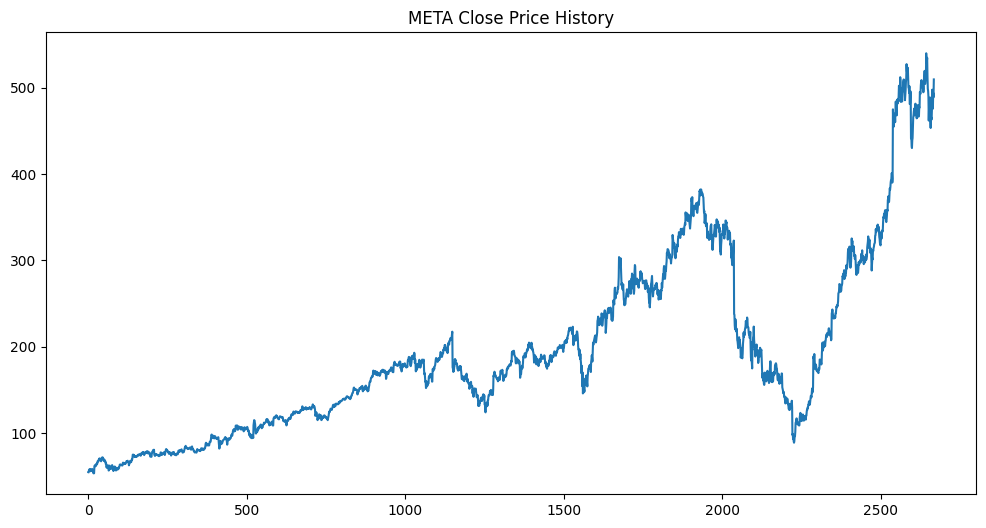

In [68]:
plt.figure(figsize=(12,6))
plt.plot(df_3['Close'])
plt.title('META Close Price History')

In [69]:
ma100 = df_3['Close'].rolling(100).mean()
ma100.isnull().sum()

99

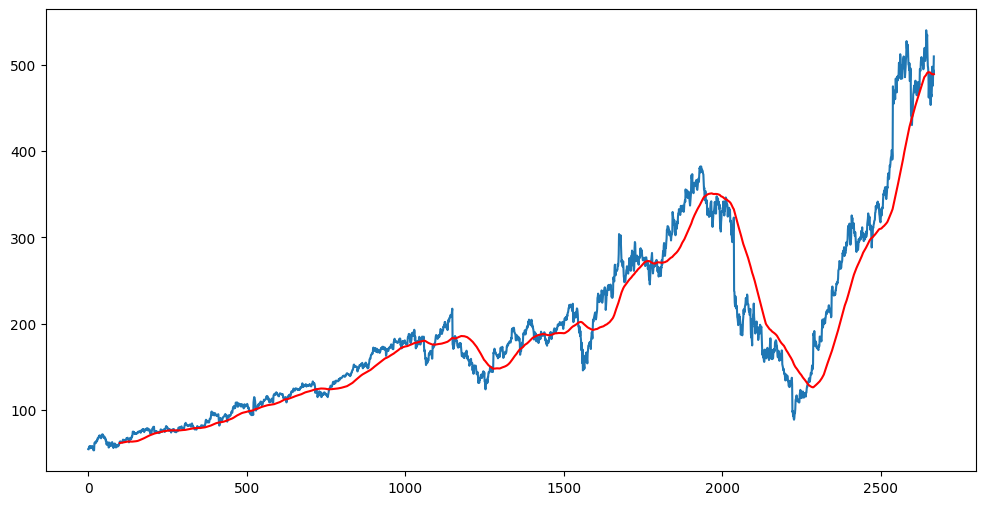

In [70]:
plt.figure(figsize=(12,6))
plt.plot(df_3['Close'])
plt.plot(ma100, 'r')

In [71]:
ma200 = df_3['Close'].rolling(200).mean()
ma200.isnull().sum()

199

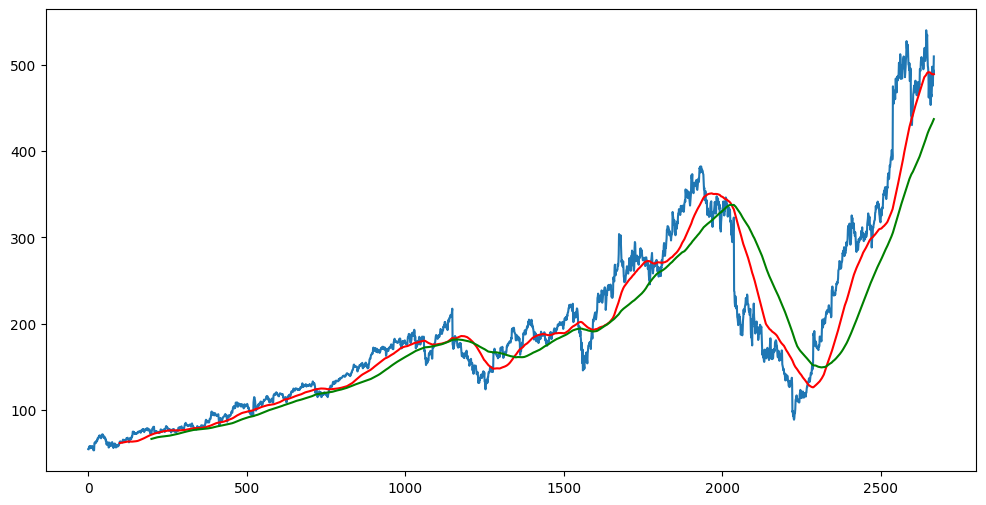

In [72]:
plt.figure(figsize=(12,6))
plt.plot(df_3['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [73]:
split_index = int(0.7 * len(df_3))

train_df = df_3['Close'].iloc[:split_index]
test_df = df_3['Close'].iloc[split_index:]

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (1867,)
Testing set shape: (801,)


In [74]:
train_df.head()

,Close
0,54.709999
1,54.560001
2,57.200001
3,57.919998
4,58.230000


In [75]:
test_df.head()

,Close
1867,326.040009
1868,330.350006
1869,336.579987
1870,333.679993
1871,330.250000


In [76]:
scaler_3 = MinMaxScaler(feature_range=(0,1))

In [77]:
train_array = scaler_3.fit_transform(np.array(train_df).reshape(-1,1))
train_array[:5]

array([[0.00422606],
       [0.00368886],
       [0.01314376],
       [0.01572237],
       [0.01683261]])

In [78]:
test_array = scaler_3.transform(np.array(test_df).reshape(-1,1))
test_array[:5]

array([[0.9759688 ],
       [0.99140465],
       [1.01371673],
       [1.00333068],
       [0.99104649]])

In [79]:
x_train_3 = []
y_train_3 = []

for i in range(100, train_array.shape[0]):
    x_train_3.append(train_array[i-100: i])
    y_train_3.append(train_array[i, 0])

x_train_3, y_train_3 = np.array(x_train_3), np.array(y_train_3)

In [80]:
x_train_3.shape

(1767, 100, 1)

In [81]:
model_3 = Sequential()
model_3.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train_3.shape[1], 1)))
model_3.add(Dropout(0.2))

model_3.add(LSTM(units=60, activation='relu', return_sequences=True))
model_3.add(Dropout(0.3))

model_3.add(LSTM(units=80, activation='relu', return_sequences=True))
model_3.add(Dropout(0.4))

model_3.add(LSTM(units=120, activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(units=1))

In [82]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model_3.compile(optimizer='adam', loss='mean_squared_error')
model_3.fit(x_train_3, y_train_3, epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 299ms/step - loss: 0.0749
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 333ms/step - loss: 0.0089
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - loss: 0.0073
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - loss: 0.0058
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0051
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 299ms/step - loss: 0.0047
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 320ms/step - loss: 0.0058
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - loss: 0.0049
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0047
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 299ms/step - loss: 0.0042
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - loss: 0.0041
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 326ms/step - loss: 0.0045
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - loss: 0.0042
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 318ms/step - loss: 0.0046
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [84]:
model_3.save('keras_model_3.h5')

In [85]:
past_100_days = train_df.tail(100)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
final_df.head()

,Close
0,267.570007
1,256.839996
2,251.089996
3,251.639999
4,245.639999


In [86]:
input_data_3 = scaler_3.fit_transform(final_df.values.reshape(-1, 1))
input_data_3 = pd.DataFrame(input_data_3, columns=[final_df.name])
input_data_3.head()

,Close
0,0.396142
1,0.372350
2,0.359601
3,0.360820
4,0.347517


In [88]:
x_test_3 = []
y_test_3 = []

input_data_3 = np.array(input_data_3)
for i in range(100, input_data_3.shape[0]):
    x_test_3.append(input_data_3[i-100: i])
    y_test_3.append(input_data_3[i, 0])

In [89]:
x_test_3, y_test_3 = np.array(x_test_3), np.array(y_test_3)
print(x_test_3.shape)
print(y_test_3.shape)

(801, 100, 1)
(801,)


In [90]:
y_pred_3 = model_3.predict(x_test_3)
y_pred_3.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step


(801, 1)

In [91]:
scale_factor_3 = 1/scaler_3.scale_
y_pred_3 = y_pred_3 * scale_factor_3
y_test_3 = y_test_3 * scale_factor_3

Text(0, 0.5, 'Price')

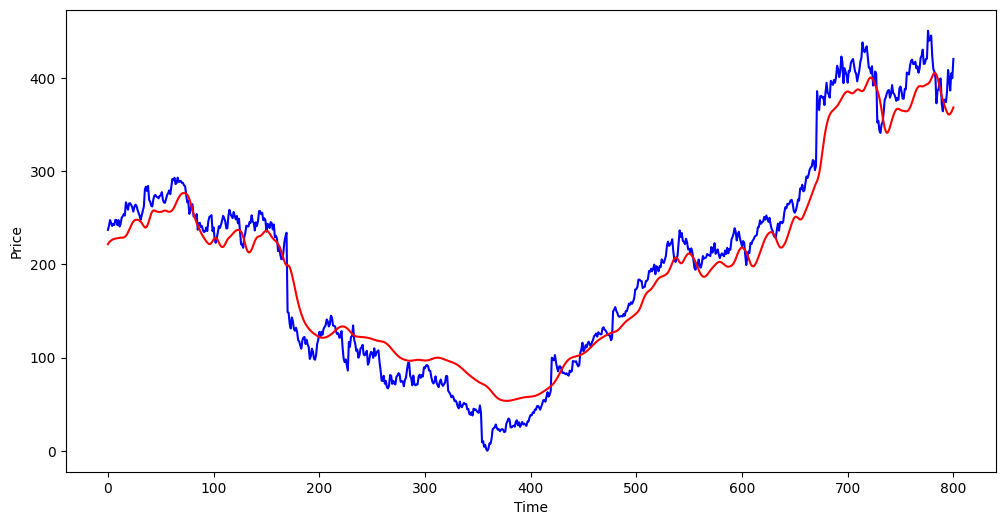

In [92]:
plt.figure(figsize=(12,6))
plt.plot(y_test_3, 'b', label='Original Price')
plt.plot(y_pred_3, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')

## HATHAWAY

In [93]:
df_4 = yf.download('BRK-B', start=start, end=end)
df_4.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,118.339996,118.500000,117.360001,117.500000,117.500000,3087000
2014-01-03,117.500000,118.000000,117.379997,117.570000,117.570000,2694500
2014-01-06,118.199997,118.199997,116.260002,116.279999,116.279999,3426000
2014-01-07,116.610001,116.949997,115.959999,116.190002,116.190002,4062000
2014-01-08,116.000000,116.370003,115.250000,115.339996,115.339996,3822700


In [94]:
df_4.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-02,429.769989,436.250000,423.489990,428.359985,428.359985,4251500
2024-08-05,413.429993,417.820007,406.109985,413.720001,413.720001,7695100
2024-08-06,416.410004,427.459991,415.100006,422.140015,422.140015,5138700
2024-08-07,426.070007,433.170013,425.600006,427.019989,427.019989,4745600
2024-08-08,429.239990,432.260010,427.600006,431.540009,431.540009,3150000


In [95]:
df_4.shape

(2668, 6)

In [96]:
df_4.reset_index(inplace=True)
df_4.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,118.339996,118.500000,117.360001,117.500000,117.500000,3087000
1,2014-01-03,117.500000,118.000000,117.379997,117.570000,117.570000,2694500
2,2014-01-06,118.199997,118.199997,116.260002,116.279999,116.279999,3426000
3,2014-01-07,116.610001,116.949997,115.959999,116.190002,116.190002,4062000
4,2014-01-08,116.000000,116.370003,115.250000,115.339996,115.339996,3822700


In [97]:
df_4.drop(['Date','Adj Close'], axis=1, inplace=True)
df_4.head()

,Open,High,Low,Close,Volume
0,118.339996,118.500000,117.360001,117.500000,3087000
1,117.500000,118.000000,117.379997,117.570000,2694500
2,118.199997,118.199997,116.260002,116.279999,3426000
3,116.610001,116.949997,115.959999,116.190002,4062000
4,116.000000,116.370003,115.250000,115.339996,3822700


Text(0.5, 1.0, 'HATHAWAY Close Price History')

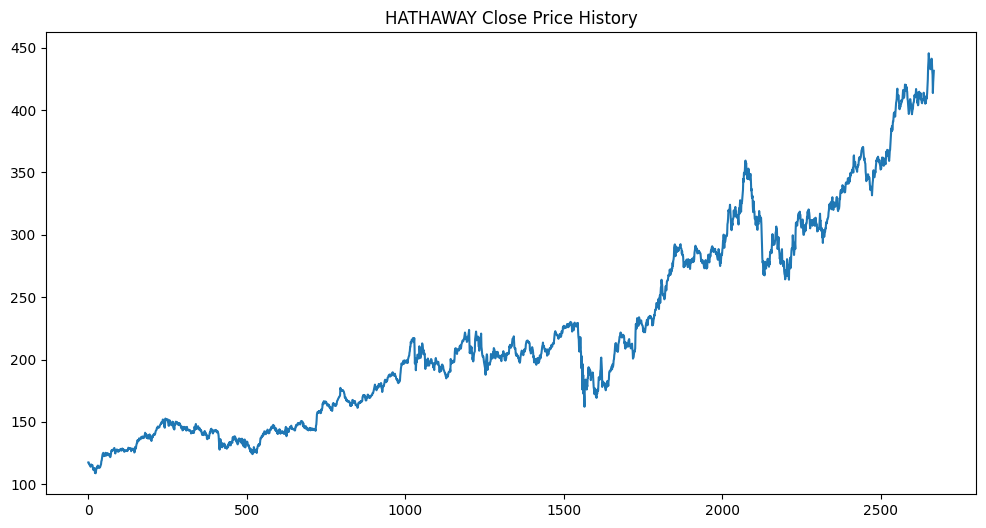

In [184]:
plt.figure(figsize=(12,6))
plt.plot(df_4['Close'])
plt.title('HATHAWAY Close Price History')

In [99]:
ma100 = df_4['Close'].rolling(100).mean()
ma100.isnull().sum()

99

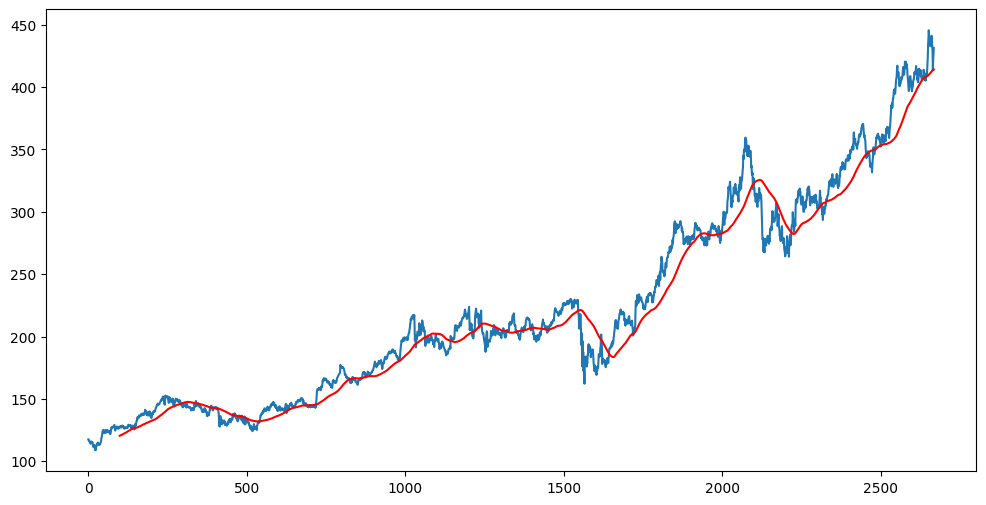

In [100]:
plt.figure(figsize=(12,6))
plt.plot(df_4['Close'])
plt.plot(ma100, 'r')

In [101]:
ma200 = df_4['Close'].rolling(200).mean()
ma200.isnull().sum()

199

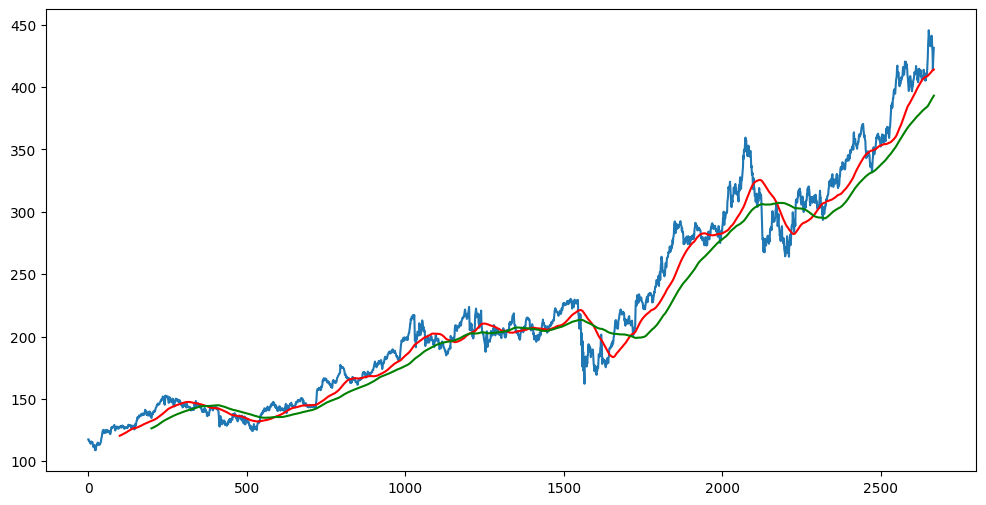

In [102]:
plt.figure(figsize=(12,6))
plt.plot(df_4['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [103]:
split_index = int(0.7 * len(df_4))

train_df = df_4['Close'].iloc[:split_index]
test_df = df_4['Close'].iloc[split_index:]

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (1867,)
Testing set shape: (801,)


In [104]:
train_df.head()

,Close
0,117.500000
1,117.570000
2,116.279999
3,116.190002
4,115.339996


In [105]:
test_df.head()

,Close
1867,291.970001
1868,292.519989
1869,289.459991
1870,289.190002
1871,288.579987


In [106]:
scaler_4 = MinMaxScaler(feature_range=(0,1))

In [107]:
train_array = scaler_4.fit_transform(np.array(train_df).reshape(-1,1))
train_array[:5]

array([[0.0475075 ],
       [0.04788887],
       [0.0408608 ],
       [0.04037049],
       [0.03573957]])

In [108]:
test_array = scaler_4.transform(np.array(test_df).reshape(-1,1))
test_array[:5]

array([[0.99803876],
       [1.00103515],
       [0.98436396],
       [0.98289303],
       [0.9795696 ]])

In [109]:
x_train_4 = []
y_train_4 = []

for i in range(100, train_array.shape[0]):
    x_train_4.append(train_array[i-100: i])
    y_train_4.append(train_array[i, 0])

x_train_4, y_train_4 = np.array(x_train_4), np.array(y_train_4)

In [110]:
x_train_4.shape

(1767, 100, 1)

In [111]:
model_4 = Sequential()
model_4.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train_4.shape[1], 1)))
model_4.add(Dropout(0.2))

model_4.add(LSTM(units=60, activation='relu', return_sequences=True))
model_4.add(Dropout(0.3))

model_4.add(LSTM(units=80, activation='relu', return_sequences=True))
model_4.add(Dropout(0.4))

model_4.add(LSTM(units=120, activation='relu'))
model_4.add(Dropout(0.5))

model_4.add(Dense(units=1))

In [112]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model_4.compile(optimizer='adam', loss='mean_squared_error')
model_4.fit(x_train_4, y_train_4, epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - loss: 0.0760
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 297ms/step - loss: 0.0109
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0063
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 304ms/step - loss: 0.0059
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 293ms/step - loss: 0.0066
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - loss: 0.0055
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 324ms/step - loss: 0.0052
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 310ms/step - loss: 0.0064
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - loss: 0.0052
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 324ms/step - loss: 0.0047
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - loss: 0.0045
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - loss: 0.0045
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - loss: 0.0043
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 300ms/step - loss: 0.0047
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [114]:
model_4.save('keras_model_4.h5')

In [115]:
past_100_days = train_df.tail(100)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
final_df.head()

,Close
0,234.029999
1,233.429993
2,233.029999
3,234.509995
4,235.020004


In [116]:
input_data_4 = scaler_4.fit_transform(final_df.values.reshape(-1, 1))
input_data_4 = pd.DataFrame(input_data_4, columns=[final_df.name])
input_data_4.head()

,Close
0,0.030561
1,0.027812
2,0.025979
3,0.032761
4,0.035097


In [117]:
input_data_4.shape

(901, 1)

In [118]:
x_test_4 = []
y_test_4 = []

input_data_4 = np.array(input_data_4)
for i in range(100, input_data_4.shape[0]):
    x_test_4.append(input_data_4[i-100: i])
    y_test_4.append(input_data_4[i, 0])

In [119]:
x_test_4, y_test_4 = np.array(x_test_4), np.array(y_test_4)
print(x_test_4.shape)
print(y_test_4.shape)

(801, 100, 1)
(801,)


In [120]:
y_pred_4 = model_4.predict(x_test_4)
y_pred_4.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step


(801, 1)

In [121]:
scale_factor_4 = 1/scaler_4.scale_
y_pred_4 = y_pred_4 * scale_factor_4
y_test_4 = y_test_4 * scale_factor_4

Text(0, 0.5, 'Price')

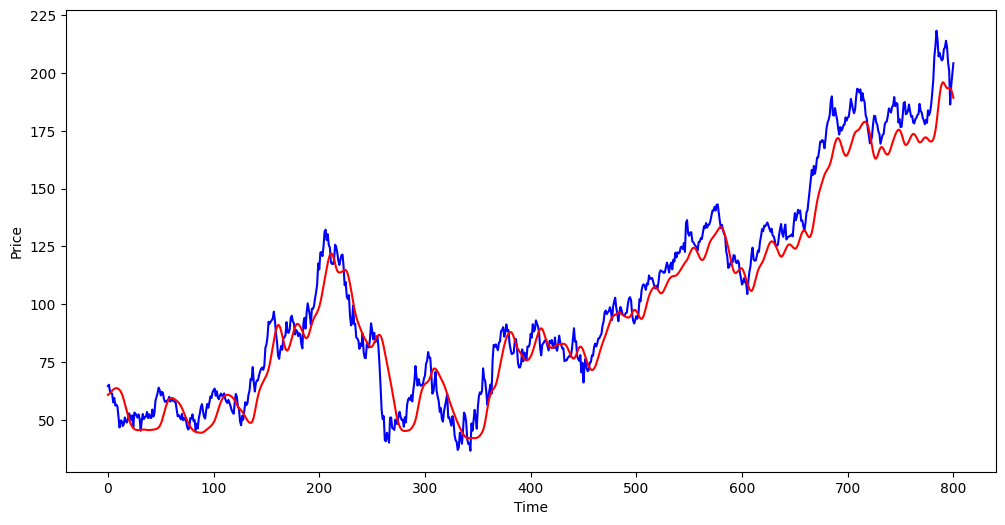

In [122]:
plt.figure(figsize=(12,6))
plt.plot(y_test_4, 'b', label='Original Price')
plt.plot(y_pred_4, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')

## AMAZON

In [123]:
df_5 = yf.download('AMZN', start=start, end=end)
df_5.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.940001,19.9680,19.701000,19.898500,19.898500,42756000
2014-01-03,19.914499,20.1355,19.811001,19.822001,19.822001,44204000
2014-01-06,19.792500,19.8500,19.421000,19.681499,19.681499,63412000
2014-01-07,19.752001,19.9235,19.714500,19.901501,19.901501,38320000
2014-01-08,19.923500,20.1500,19.802000,20.096001,20.096001,46330000


In [124]:
df_5.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-02,166.750000,168.770004,160.550003,167.899994,167.899994,141448400
2024-08-05,154.210007,162.960007,151.610001,161.020004,161.020004,83149400
2024-08-06,161.710007,165.080002,158.539993,161.929993,161.929993,59950800
2024-08-07,166.550003,167.580002,161.429993,162.770004,162.770004,48408200
2024-08-08,165.169998,166.690002,162.550003,165.800003,165.800003,44616200


In [125]:
df_5.shape

(2668, 6)

In [126]:
df_5.reset_index(inplace=True)
df_5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.940001,19.9680,19.701000,19.898500,19.898500,42756000
1,2014-01-03,19.914499,20.1355,19.811001,19.822001,19.822001,44204000
2,2014-01-06,19.792500,19.8500,19.421000,19.681499,19.681499,63412000
3,2014-01-07,19.752001,19.9235,19.714500,19.901501,19.901501,38320000
4,2014-01-08,19.923500,20.1500,19.802000,20.096001,20.096001,46330000


In [127]:
df_5.drop(['Date','Adj Close'], axis=1, inplace=True)
df_5.head()

,Open,High,Low,Close,Volume
0,19.940001,19.9680,19.701000,19.898500,42756000
1,19.914499,20.1355,19.811001,19.822001,44204000
2,19.792500,19.8500,19.421000,19.681499,63412000
3,19.752001,19.9235,19.714500,19.901501,38320000
4,19.923500,20.1500,19.802000,20.096001,46330000


Text(0.5, 1.0, 'AMAZON Close Price History')

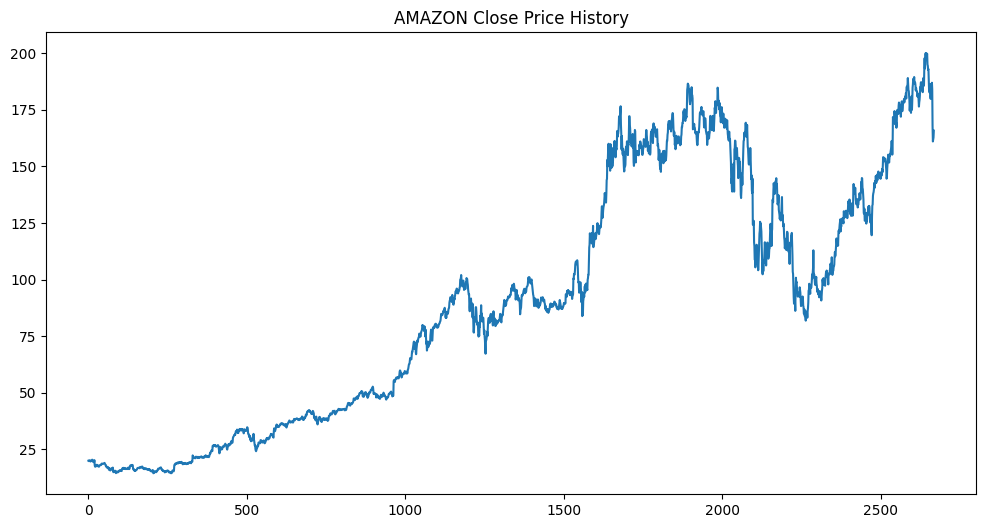

In [185]:
plt.figure(figsize=(12,6))
plt.plot(df_5['Close'])
plt.title('AMAZON Close Price History')

In [129]:
ma100 = df_5['Close'].rolling(100).mean()
ma100.isnull().sum()

99

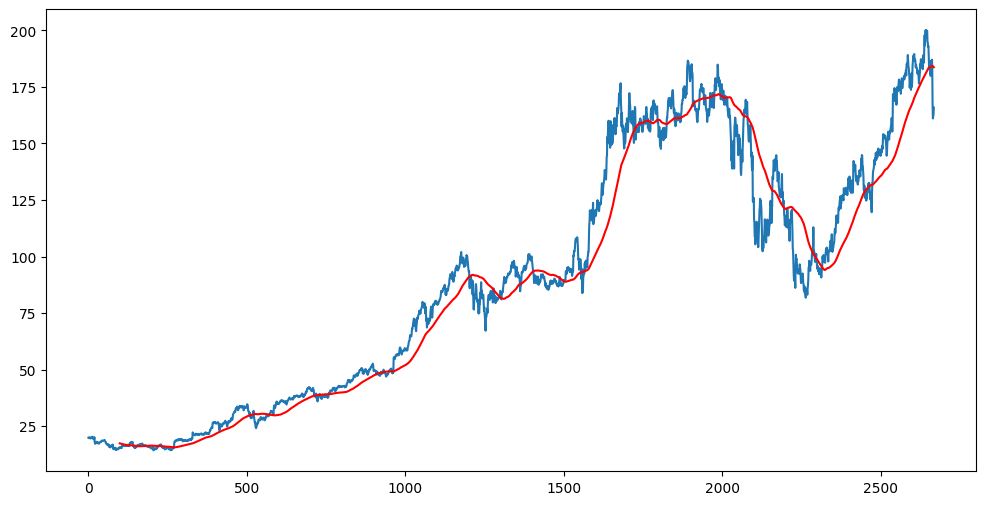

In [130]:
plt.figure(figsize=(12,6))
plt.plot(df_5['Close'])
plt.plot(ma100, 'r')

In [131]:
ma200 = df_5['Close'].rolling(200).mean()
ma200.isnull().sum()

199

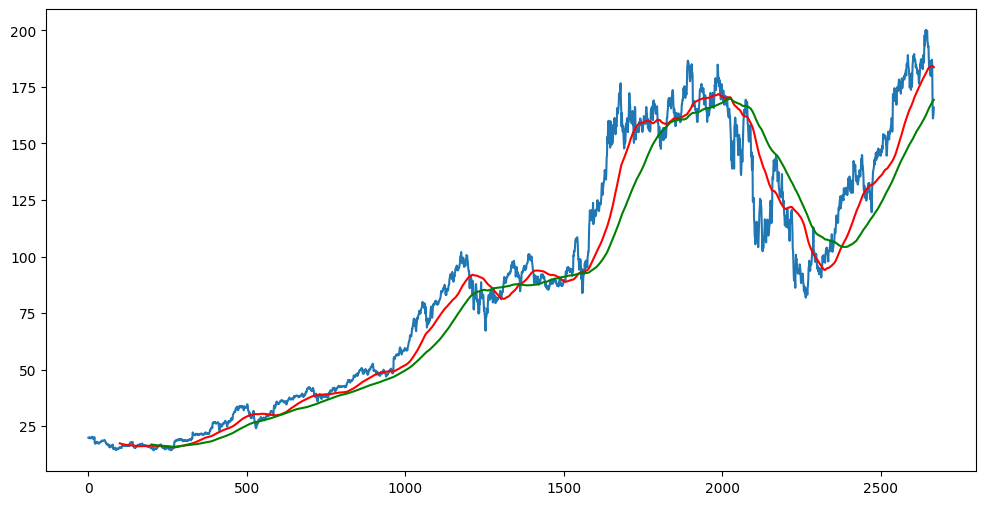

In [132]:
plt.figure(figsize=(12,6))
plt.plot(df_5['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [133]:
split_index = int(0.7 * len(df_5))

train_df = df_5['Close'].iloc[:split_index]
test_df = df_5['Close'].iloc[split_index:]

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (1867,)
Testing set shape: (801,)


In [134]:
train_df.head()

,Close
0,19.898500
1,19.822001
2,19.681499
3,19.901501
4,20.096001


In [135]:
test_df.head()

,Close
1867,159.350494
1868,160.311005
1869,159.900497
1870,163.205505
1871,164.057495


In [136]:
scaler_5 = MinMaxScaler(feature_range=(0,1))

In [137]:
train_array = scaler_5.fit_transform(np.array(train_df).reshape(-1,1))
train_array[:5]

array([[0.03421791],
       [0.03374635],
       [0.03288026],
       [0.03423641],
       [0.03543536]])

In [138]:
test_array = scaler_5.transform(np.array(test_df).reshape(-1,1))
test_array[:5]

array([[0.8938388 ],
       [0.89975965],
       [0.89722917],
       [0.91760216],
       [0.92285406]])

In [139]:
x_train_5 = []
y_train_5 = []

for i in range(100, train_array.shape[0]):
    x_train_5.append(train_array[i-100: i])
    y_train_5.append(train_array[i, 0])

x_train_5, y_train_5 = np.array(x_train_5), np.array(y_train_5)

In [140]:
x_train_5.shape

(1767, 100, 1)

In [141]:
model_5 = Sequential()
model_5.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train_5.shape[1], 1)))
model_5.add(Dropout(0.2))

model_5.add(LSTM(units=60, activation='relu', return_sequences=True))
model_5.add(Dropout(0.3))

model_5.add(LSTM(units=80, activation='relu', return_sequences=True))
model_5.add(Dropout(0.4))

model_5.add(LSTM(units=120, activation='relu'))
model_5.add(Dropout(0.5))

model_5.add(Dense(units=1))

In [142]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
model_5.compile(optimizer='adam', loss='mean_squared_error')
model_5.fit(x_train_5, y_train_5, epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 309ms/step - loss: 0.0712
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 308ms/step - loss: 0.0084
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - loss: 0.0069
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 296ms/step - loss: 0.0067
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - loss: 0.0051
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - loss: 0.0050
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 329ms/step - loss: 0.0056
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 296ms/step - loss: 0.0042
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step - loss: 0.0046
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 318ms/step - loss: 0.0051
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step - loss: 0.0048
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - loss: 0.0043
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 311ms/step - loss: 0.0036
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step - loss: 0.0041
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 

In [144]:
model_5.save('keras_model_5.h5')

In [145]:
past_100_days = train_df.tail(100)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
final_df.head()

,Close
0,159.134995
1,155.710495
2,156.041504
3,158.294495
4,156.373505


In [146]:
input_data_5 = scaler_5.fit_transform(final_df.values.reshape(-1, 1))
input_data_5 = pd.DataFrame(input_data_5, columns=[final_df.name])
input_data_5.head()

,Close
0,0.654214
1,0.625237
2,0.628038
3,0.647102
4,0.630847


In [147]:
input_data_5.shape

(901, 1)

In [148]:
x_test_5 = []
y_test_5 = []

input_data_5 = np.array(input_data_5)
for i in range(100, input_data_5.shape[0]):
    x_test_5.append(input_data_5[i-100: i])
    y_test_5.append(input_data_5[i, 0])

In [149]:
x_test_5, y_test_5 = np.array(x_test_5), np.array(y_test_5)
print(x_test_5.shape)
print(y_test_5.shape)

(801, 100, 1)
(801,)


In [150]:
y_pred_5 = model_5.predict(x_test_5)
y_pred_5.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step


(801, 1)

In [151]:
scale_factor_5 = 1/scaler_5.scale_
y_pred_5 = y_pred_5 * scale_factor_5
y_test_5 = y_test_5 * scale_factor_5

Text(0, 0.5, 'Price')

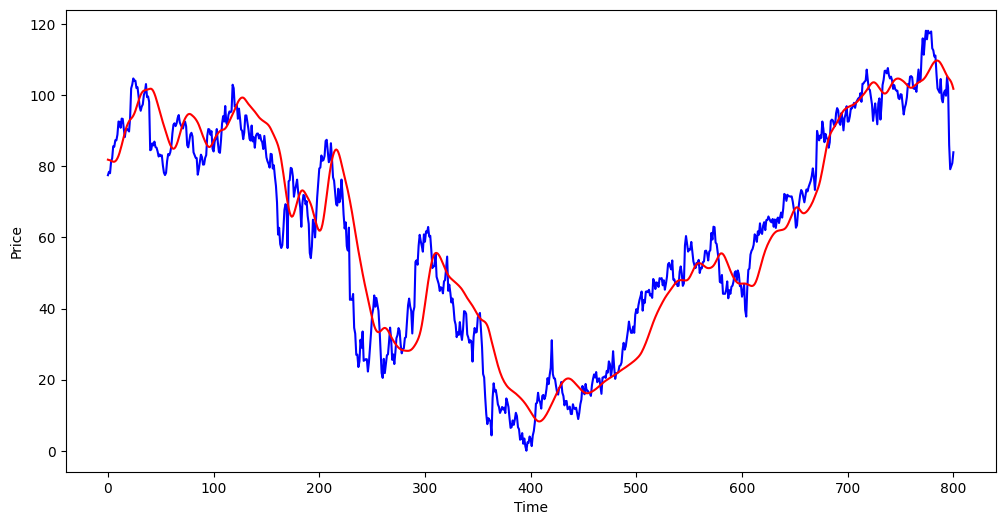

In [152]:
plt.figure(figsize=(12,6))
plt.plot(y_test_5, 'b', label='Original Price')
plt.plot(y_pred_5, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')

# Comperative analysis of different stocks for future predictions

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


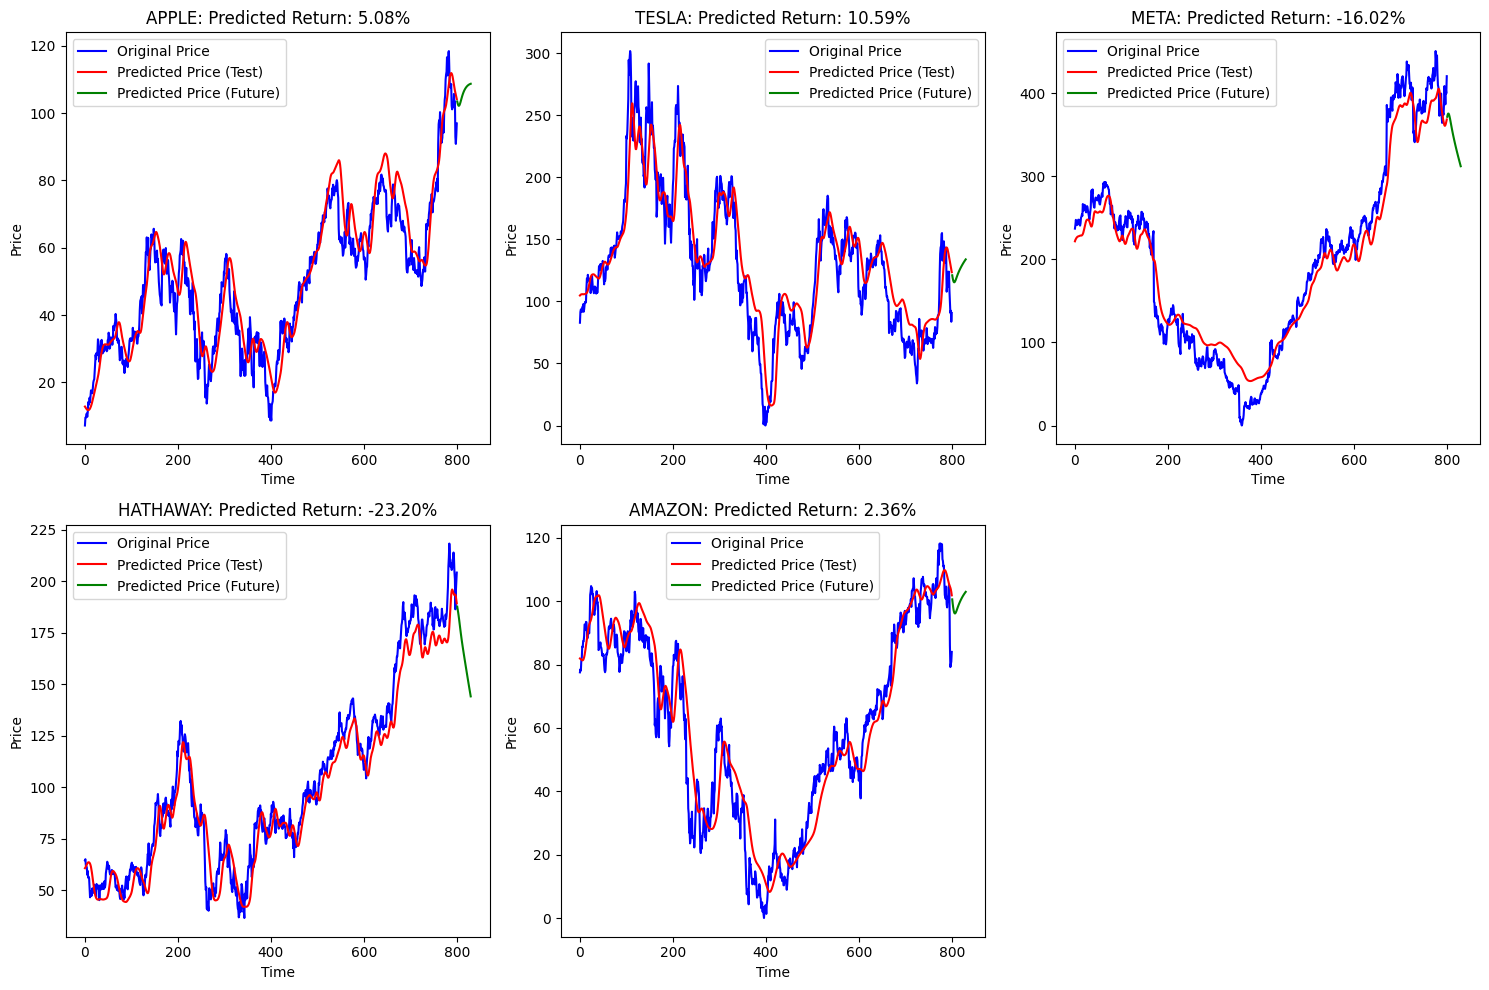

In [186]:
def predict_future_prices(model, input_data, y_test, scale_factor, num_days=30):
    last_100_days = np.copy(input_data[-100:])
    predictions = []

    for _ in range(num_days):
        pred = model.predict(last_100_days.reshape(1, -1, last_100_days.shape[1]), verbose=0)
        predictions.append(pred[0, 0])
        last_100_days = np.roll(last_100_days, shift=-1, axis=0)
        last_100_days[-1] = pred

    predictions = np.array(predictions)
    predictions = predictions * scale_factor

    initial_price = predictions[0]
    final_price = predictions[-1]
    predicted_return = ((final_price - initial_price) / initial_price) * 100

    return predictions, predicted_return

num_days = 30
stock_names = ["APPLE", "TESLA", "META", "HATHAWAY", "AMAZON"]

input_data_list = [input_data_1, input_data_2, input_data_3, input_data_4, input_data_5]
y_test_list = [y_test_1, y_test_2, y_test_3, y_test_4, y_test_5]
x_test_list = [x_test_1, x_test_2, x_test_3, x_test_4, x_test_5]
scale_factors = [scale_factor_1, scale_factor_2, scale_factor_3, scale_factor_4, scale_factor_5]
models = [model_1, model_2, model_3, model_4, model_5]

predicted_returns = []

plt.figure(figsize=(15, 10))
for i in range(5):
    predictions, predicted_return = predict_future_prices(models[i], input_data_list[i], y_test_list[i], scale_factors[i])
    predicted_returns.append(predicted_return)

    future_index = np.arange(len(y_test_list[i]), len(y_test_list[i]) + num_days)

    plt.subplot(2, 3, i + 1)
    plt.plot(np.arange(len(y_test_list[i])), y_test_list[i], 'b', label='Original Price')
    plt.plot(np.arange(len(y_test_list[i])), models[i].predict(x_test_list[i]) * scale_factors[i], 'r', label='Predicted Price (Test)')
    plt.plot(future_index, predictions, 'g', label='Predicted Price (Future)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'{stock_names[i]}: Predicted Return: {predicted_return:.2f}%')

plt.tight_layout()
plt.show()

In [182]:
stock_returns = []

for i in range(5):
    predictions, predicted_return = predict_future_prices(models[i], input_data_list[i], y_test_list[i], scale_factors[i])
    if predicted_return > 0:
        stock_returns.append((stock_names[i], predicted_return))

stock_returns.sort(key=lambda x: x[1], reverse=True)

for stock_name, predicted_return in stock_returns:
    print(f'{stock_name}: Predicted Return {predicted_return:.2f}%')

TESLA: Predicted Return 10.59%
APPLE: Predicted Return 5.08%
AMAZON: Predicted Return 2.36%
